In [19]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plot
import numpy as np

(506, 13) ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] (506,)


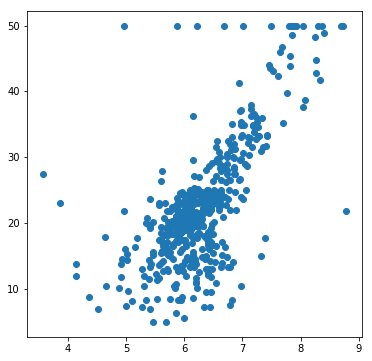

In [28]:
#genrate data 
plot.rcParams["figure.figsize"] = (6,6)
from sklearn import datasets
boston_dataset=datasets.load_boston()
print(boston_dataset.data.shape,boston_dataset.feature_names,boston_dataset.target.shape)
Xs = np.array(boston_dataset.data[:,5])
Ys = np.array(boston_dataset.target)
plot.scatter(Xs, Ys)

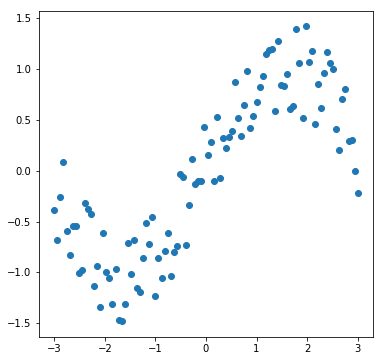

''

In [37]:
#plot.rcParams["figure.figsize"] = (14,8)

n_observations = 100
Xs = np.linspace(-3, 3, n_observations)
Ys = np.sin(Xs) + np.random.uniform(-0.5, 0.5, n_observations)
plot.scatter(Xs, Ys)
plot.show()
''''''

In [29]:
X = tf.placeholder(tf.float32,name="Xrm")
Y = tf.placeholder(tf.float32,name="Y")
W = tf.Variable(tf.random_normal([1]),name="weights")
b = tf.Variable(tf.random_normal([1]),name="bias")
Ypred = tf.add(tf.multiply(X,W),b) #predict
#loss
loss = tf.square(Y - Ypred,name='loss')
#初始化优化器
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

n_samples = Xs.shape[0]
print(n_samples)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('.\linear_reg',sess.graph)
    # 训练模型
    for i in range(100):
        total_loss = 0
        for x, y in zip(Xs, Ys):
           # 通过feed_dic把数据灌进去
            t, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
#         b = total_loss/n_samples
#         writer.add_summary(l,i)
        if i%10 ==0:
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
    # 关闭writer
    writer.close() 
    # 取出w和b的值
    W, b = sess.run([W, b]) 

506
Epoch 0: [26.529982]
Epoch 10: [24.293718]
Epoch 20: [23.725262]
Epoch 30: [23.523382]
Epoch 40: [23.443525]
Epoch 50: [23.408783]
Epoch 60: [23.392578]
Epoch 70: [23.384676]
Epoch 80: [23.380753]
Epoch 90: [23.37875]


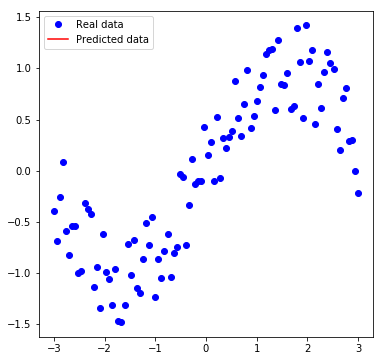

In [39]:
plot.plot(Xs, Ys, 'bo', label='Real data')
plot.plot(Xs, Xs * W + b, 'r', label='Predicted data')
plot.legend()
plot.show()

(506, 1) (506, 1)


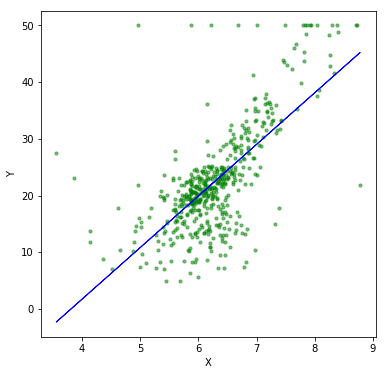

In [35]:
#compared with sklearn    
from sklearn.linear_model import LinearRegression
l=LinearRegression()
Xt = Xs.reshape(Xs.shape[0],1)  #input  must be matrix  ,analysis how to upgrade
Yt = Ys.reshape(Ys.shape[0],1)
print(Xt.shape,Yt.shape)
l.fit(Xt,Yt)
plot.scatter(Xt,Yt,s=10,alpha=0.5,c='green')
plot.plot(Xt,l.predict(Xt),c='blue',linewidth='1')
plot.xlabel("X")
plot.ylabel("Y")
plot.show()

In [49]:
#高阶
X = tf.placeholder(tf.float32,name="Xrm")
Y = tf.placeholder(tf.float32,name="Y")
W = tf.Variable(tf.random_normal([1]),name="weights")
b = tf.Variable(tf.random_normal([1]),name="bias")
Ypred = tf.add(tf.multiply(X,W),b) #predict
W_1 = tf.Variable(tf.random_normal([1]),name="W1")
Ypred = tf.add(tf.multiply(tf.pow(X,2),W_1),Ypred) 
W_2 = tf.Variable(tf.random_normal([1]),name="W2")
Ypred = tf.add(tf.multiply(tf.pow(X,3),W_2),Ypred) 


#loss
#loss = tf.square(Y - Ypred,name='loss')
#loss = tf.reduce_mean(tf.pow(Y - Ypred,2),name='loss') #仅仅变化了loss函数  就从之前nan 变成现在还算可以的精度
sample_num = Xs.shape[0]
loss = tf.reduce_sum(tf.pow(Ypred - Y, 2)) / sample_num
#初始化优化器
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

n_samples = Xs.shape[0]
print(n_samples)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('.\poly_reg',sess.graph)
    # 训练模型
    for i in range(1000):
        total_loss = 0
        for x, y in zip(Xs, Ys):
           # 通过feed_dic把数据灌进去
            t, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
#         b = total_loss/n_samples
#         writer.add_summary(l,i)
        if i%20 ==0:
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
    # 关闭writer
    writer.close() 
    # 取出w和b的值
    W_2,W_1,W, b = sess.run([W_2,W_1,W, b]) 

100
Epoch 0: 0.3953740814415005
Epoch 20: 0.00412261448526209
Epoch 40: 0.003035731501267067
Epoch 60: 0.0023129156733648413
Epoch 80: 0.0018217453591631739
Epoch 100: 0.001488218869000093
Epoch 120: 0.0012619484215618292
Epoch 140: 0.0011086118952022162
Epoch 160: 0.0010048470450612968
Epoch 180: 0.0009347525508556487
Epoch 200: 0.0008875033751525052
Epoch 220: 0.000855737599355848
Epoch 240: 0.0008344550281335117
Epoch 260: 0.0008202591331719589
Epoch 280: 0.0008108408678964629
Epoch 300: 0.0008046368188435337
Epoch 320: 0.0008005862693379129
Epoch 340: 0.0007979757731950698
Epoch 360: 0.0007963203130764906
Epoch 380: 0.0007952956150437273
Epoch 400: 0.0007946828858166644
Epoch 420: 0.0007943365763714638
Epoch 440: 0.00079415995535291
Epoch 460: 0.0007940887552115683
Epoch 480: 0.000794081075719788
Epoch 500: 0.0007941096919236657
Epoch 520: 0.0007941571352266763
Epoch 540: 0.0007942126959529717
Epoch 560: 0.0007942697497142603
Epoch 580: 0.0007943246921110169
Epoch 600: 0.0007943752

(100,) (100,)
[-0.09772032] [-0.0043804] [0.89527273] [-1.0093692e-05]
W_2:-0.097720325
W_1:-0.004380405
W:0.89527273
b:-1.0093692e-05


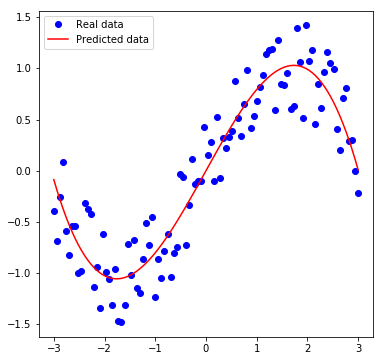

In [50]:
plot.plot(Xs, Ys, 'bo', label='Real data')
print(Xs.shape,Ys.shape)
print(W_2,W_1,W,b)
print("W_2:"+str(W_2[0]))
print("W_1:"+str(W_1[0]))
print("W:"+str(W[0]))
print("b:"+str(b[0]))
plot.plot(Xs, Xs * W + np.power(Xs,2)*W_1 + np.power(Xs,3)*W_2 + b, 'r', label='Predicted data')
plot.legend()
plot.show()

In [60]:
#logistic regree
[(i,j) for i in range(5) for j in range(2)]
a = {'a','b','c','d'}
b = {'b','c' ,'d','e'}
# a|b
# a&b
# a-b
# b - a
a.update(b) 
a

{'a', 'b', 'c', 'd', 'e'}